In [1]:
from ipywidgets import interactive,interactive_output
from ipywidgets import IntSlider, Label
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'cm'

---
**_NOTE:_**  The following notebook can be used to explore the fundamentals of Twiss parametrization for 4D Gaussian distribution. The second part of this notebook enables the user to generate 4D random samples from the corresponding Gaussian distribution using a Metropolis-Hastings sampling algorithm.

---


# 4D INITIAL GAUSSIAN DISTRIBUTION

The 4-D Gaussian probability Distribution for a Gaussian Density profile in phase space is:

\begin{equation}
\large 
f(x,x',y,y')=\frac{1}{4 \pi^2 \epsilon_{rms,x} \epsilon_{rms,y}}\exp \left[ -\frac{\gamma_x x^2+2 \alpha_x x x' +\beta_x x'^2}{2 \epsilon_{rms,x}} - \frac{\gamma_y y^2+2 \alpha_y y y' +\beta_y y'^2}{2 \epsilon_{rms,y}}\right]
\end{equation}

Where all the Twiss parameters are not necessarily independent and are set by the follwoing equation:

\begin{equation}
\large 
\gamma_i=\frac{1+\alpha_i^2}{\beta_i}
\end{equation}

In [2]:
def densityexp(x,xp,y,yp,ax=1,bx=1,ermsx=1,ay=1,by=1,ermsy=1):
    """
    This function returns the Gaussian probability distribution vector at x,x',y,y' with the corresponding Twiss parameters
    
    Parameters
    ----------
    x : float
        vector with the transverse values for the x-direction 
    xp : float
        vector with the transverse values for the x-momentum
    y : float
        vector with the transverse values for the y-direction 
    yp : float
        vector with the transverse values for the y-momentum
    ax, bx, ermsx: float
        Twiss parameters (alpha and beta) and the emmitance for the x-direction
    ay, by, ermsy: float
        Twiss parameters (alpha and beta) and the emmitance for the y-direction           
    """
    
    # Calculate the gamma Twiss parameter
    gx=(1+ax**2)/bx
    gy=(1+ay**2)/by
    
    # Calculate element by element the value for the Gaussian distribution 
    xterm=(gx*np.square(x)+2*ax*np.multiply(x,xp)+bx*np.square(xp))/(2*ermsx)
    yterm=(gy*np.square(y)+2*ay*np.multiply(y,yp)+by*np.square(yp))/(2*ermsy)
    fdens=(1/((np.pi**2)*4*ermsx*ermsy))*np.exp(-xterm-yterm)
    
    return fdens

## Plot the theoretical density

In [3]:
# Create the plot in order to interact with the Gaussian Distribution
def gaussian_plots(ax=1,bx=1,ermsx=1,ay=1,by=1,ermsy=1):
    """
    This function returns two plots (one for each direction) 
    for a Gaussian probability distribution with the input Twiss parameters
    
    Parameters
    ----------
    ax, bx, ermsx: float
        Twiss parameters (alpha and beta) and the emmitance for the x-direction
    ay, by, ermsy: float
        Twiss parameters (alpha and beta) and the emmitance for the y-direction           
    """
    
    # Calculate the gamma Twiss parameter
    gx=(1+ax**2)/bx
    gy=(1+ay**2)/by
    
    # Choose the largest limit in both directions for plotting
    # Choose only one in order to have same scale in x and y plots
    xlim = np.amax([2*np.sqrt(ermsx*bx),2*np.sqrt(ermsy*by)])
    xplim = np.amax([2*np.sqrt(ermsx*gx),2*np.sqrt(ermsy*gy)])
    
    # Create the 2D grid over which we will evaluate the density function
    xplot = np.linspace(-xlim, xlim, 51)
    xpplot = np.linspace(-xplim, xplim, 51)
    
    yplot = np.linspace(-xlim, xlim, 51)
    ypplot = np.linspace(-xplim, xplim, 51)
    
    [xgrid,xpgrid]=np.meshgrid(xplot,xpplot)
    [ygrid,ypgrid]=np.meshgrid(yplot,ypplot)
    
    # Fix the y value (take a slice), so the x-data can be visualized in 2D (This can be changed)
    # Evaluate the probability density function with the x-grid and the fixed y and yp values
    fixed_y=0
    fixed_yp=0
    projx=densityexp(xgrid,xpgrid,fixed_y,fixed_yp,ax,bx,ermsx,ay,by,ermsy)

    # Fix the y value (take a slice), so the y-data can be visualized in 2D (This can be changed)
    # Evaluate the probability density function with the y-grid and the fixed y and yp values
    fixed_x=0
    fixed_xp=0
    projy=densityexp(fixed_x,fixed_xp,ygrid,ypgrid,ax,bx,ermsx,ay,by,ermsy)
    
    # Create 2D plots, both for the (x,xp) and (y,yp) planes 
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6), sharey=True)
    ax1.pcolormesh(xgrid,xpgrid,projx,shading='gouraud',cmap='inferno')
    ax1.set_xlabel(r"$x$",fontsize=28)
    ax1.set_ylabel(r"$x'$",fontsize=28)
    
    ax2.pcolormesh(ygrid,ypgrid,projy,shading='gouraud',cmap='inferno')
    ax2.set_xlabel(r"$y$",fontsize=28)
    ax2.set_ylabel(r"$y'$",fontsize=28)
    
    plt.tight_layout()
    
    return fig

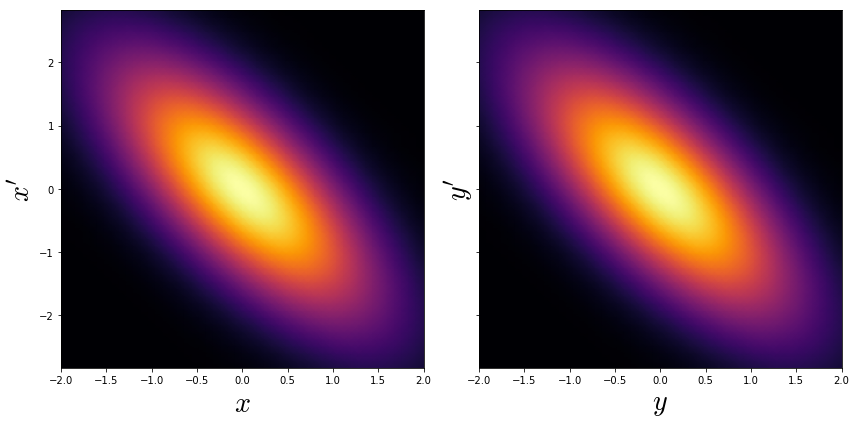

In [4]:
# Example of the Gaussian plot with default Twiss parameters
example1=gaussian_plots()

In [5]:
# Create interactive plot in order to visualize the distributions
# Create widgets to change the Twiss parameters and emmitances of both plots
ax_widget=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

bx_widget=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsx_widget=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_x$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

ay_widget=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

by_widget=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsy_widget=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_y$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

# Save widgets into widgets boxes
left_box= VBox([ax_widget, bx_widget, ermsx_widget])
right_box= VBox([ay_widget, by_widget, ermsy_widget])
widget_box= HBox([left_box, right_box])

# Create interactive plot with the corresponding widgets
output= interactive_output(gaussian_plots,{'ax': ax_widget, 'bx': bx_widget, 'ermsx': ermsx_widget,
                                           'ay': ay_widget, 'by': by_widget, 'ermsy': ermsy_widget})

In [6]:
# Initiate interactive plot
widgets.VBox([widget_box, output])

## Sampling the Gaussian Distribution

In [12]:
# Create the function to sample the Gaussian distribution with some Twiss parameters
def mh_gaussian(size=10000,ax=1,bx=1,ermsx=1,ay=1,by=1,ermsy=1):
    """
    This function returns 4D samples (4D vector of coordinates) of size=size 
    from sampling a Gaussian distribution from the given Twiss parameters
    
    Parameters
    ----------
    size: int
        Number of samples to be returned
    ax, bx, ermsx: float
        Twiss parameters (alpha and beta) and the emmitance for the x-direction
    ay, by, ermsy: float
        Twiss parameters (alpha and beta) and the emmitance for the y-direction           
    """
    
    # Define the burning size given that the first iterations of Metropolis-Hastings are not in general accurate
    burnin_size = np.int(0.1*size)
    size += np.int(burnin_size)
    
    # Initiate Metropolis-Hastings algorithm
    x0 = np.array([0,0,0,0])
    xt = x0
    cov_jump=np.array([[ermsx*bx, 0., 0., 0.],
                       [0., ermsx*gx, 0., 0.],
                       [0., 0., ermsy*by, 0.],
                       [0., 0., 0., ermsy*gy]])
    
    samples = []
    i=0
    while i<size:
        xt_candidate = np.random.multivariate_normal(xt, cov_jump)
        accept_prob = (densityexp(xt_candidate[0],xt_candidate[1],xt_candidate[2],xt_candidate[3],ax,bx,ermsx,ay,by,ermsy))/(densityexp(xt[0],xt[1],xt[2],xt[3],ax,bx,ermsx,ay,by,ermsy))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
            samples.append(xt)
            i=i+1
            
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 4])
    
    return samples

In [13]:
def gaussian_sampling_plot(N=10000,ax=1,bx=1,ermsx=1,ay=1,by=1,ermsy=1):
    """
    This function returns four plots visualizing the sampling from the Gaussian 4D distribution
    - The first row of plots is the scatter plot for the projection of the sample onto each plane
    - The second row corresponds to the 2D histograms from the projection of the samples in each plane
    
    Parameters
    ----------
    N: int
        Number of 4D data points to be sampled 
    ax, bx, ermsx: float
        Twiss parameters (alpha and beta) and the emmitance for the x-direction
    ay, by, ermsy: float
        Twiss parameters (alpha and beta) and the emmitance for the y-direction           
    """
    
    # Calculate the gamma Twiss parameter
    gx=(1+ax**2)/bx
    gy=(1+ay**2)/by
    
    # Create the random samples from the Metropolis-Hastings sampling algorithm
    samples=mh_gaussian(N,ax,bx,ermsx,ay,by,ermsy)
    
    # Create the plots in order to visualize the 4D data points
    fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
    cmap1 = mpl.cm.get_cmap('inferno')
    cmin=cmap1(0)
    
    ax1.scatter(samples[:,0], samples[:,1], s=0.05)
    ax1.set_xlabel(r"$x$",fontsize=28)
    ax1.set_ylabel(r"$x'$",fontsize=28)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    
    ax2.scatter(samples[:,2], samples[:,3], s=0.05)
    ax2.set_xlabel(r"$y$",fontsize=28)
    ax2.set_ylabel(r"$y'$",fontsize=28)
    ax2.xaxis.set_tick_params(which='both', labelbottom=True)
    
    ax3.hist2d(samples[:,0], samples[:,1], bins=51, cmap=cmap1)
    ax3.set_facecolor(cmin)
    ax3.set_xlabel(r"$x$",fontsize=28)
    ax3.set_ylabel(r"$x'$",fontsize=28)
    
    ax4.hist2d(samples[:,2], samples[:,3], bins=51, cmap=cmap1)
    ax4.set_facecolor(cmin)
    ax4.set_xlabel(r"$y$",fontsize=28)
    ax4.set_ylabel(r"$y'$",fontsize=28)
    
    xlim = np.amax([4*np.sqrt(ermsx*bx),4*np.sqrt(ermsy*by)])
    xplim = np.amax([4*np.sqrt(ermsx*gx),4*np.sqrt(ermsy*gy)])
    
    plt.xlim(-xlim,xlim)
    plt.ylim(-xplim,xplim)
    plt.tight_layout()
    
    return fig

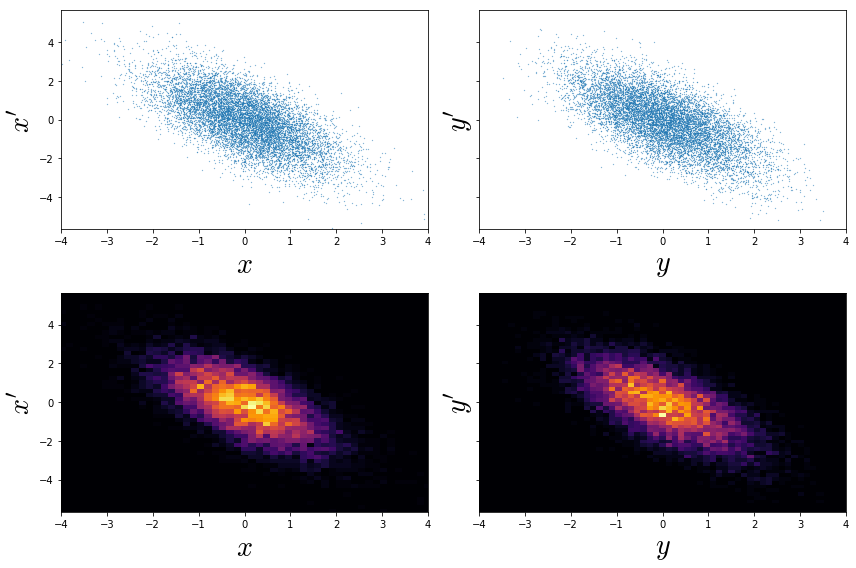

In [14]:
# Show an example of the sampling plots with default Twiss parameters
example2=gaussian_sampling_plot()

In [15]:
# Create interactive plot in order to visualize the distributions
# Create widgets to change the Twiss parameters and emmitances of both plots
N_widget=widgets.IntSlider(min=1, max=1000000, step=100, value=10000, description=r'$N$', 
                              continuous_update=False, fontsize=26,readout_format='d')

ax_widget=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

bx_widget=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsx_widget=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_x$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

ay_widget=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

by_widget=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsy_widget=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_y$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

# Save widgets into widgets boxes
left_box= VBox([ax_widget, bx_widget, ermsx_widget])
right_box= VBox([ay_widget, by_widget, ermsy_widget])
widget_box2= VBox([HBox([Label('Number of particles'),N_widget]),HBox([left_box, right_box])])

# Create interactive plot with the corresponding widgets
output2= interactive_output(gaussian_sampling_plot,{'N': N_widget, 'ax': ax_widget, 'bx': bx_widget, 'ermsx': ermsx_widget,
                                           'ay': ay_widget, 'by': by_widget, 'ermsy': ermsy_widget})

In [16]:
# Initiate interactive plot
# Be patient for large N (sampling size) it takes some time for the plot to update
widgets.VBox([widget_box2, output2])

## Comparing Theoretical Distribution with Sampling Result

In [17]:
def gaussian_compare_plot(N=10000,ax=1,bx=1,ermsx=1,ay=1,by=1,ermsy=1):
    """
    This function returns six plots comparing the sampling with the theoretical Gaussian 4D distribution
    - The first row of plots is the theoretical 2D Gaussian distribution with fixed (y,yp) and (x,xp)
    - The second row of plots is the scatter plot for the projection of the sample onto each plane
    - The third row corresponds to the 2D histograms from the projection of the samples in each plane
    
    Parameters
    ----------
    N: int
        Number of 4D data points to be sampled 
    ax, bx, ermsx: float
        Twiss parameters (alpha and beta) and the emmitance for the x-direction
    ay, by, ermsy: float
        Twiss parameters (alpha and beta) and the emmitance for the y-direction           
    """
    
    # Calculate the gamma Twiss parameter
    gx=(1+ax**2)/bx
    gy=(1+ay**2)/by
    
    # Create the random samples from the Metropolis-Hastings sampling algorithm
    samples=mh_gaussian(N,ax,bx,ermsx,ay,by,ermsy)
    
    # Choose the largest limit in both directions for plotting
    # Choose only one in order to have same scale in x and y plots
    xlim = np.amax([4*np.sqrt(ermsx*bx),4*np.sqrt(ermsy*by)])
    xplim = np.amax([4*np.sqrt(ermsx*gx),4*np.sqrt(ermsy*gy)])
    
    # Create the 2D grid over which we will evaluate the density function
    xplot = np.linspace(-xlim, xlim, 51)
    xpplot = np.linspace(-xplim, xplim, 51)
    
    yplot = np.linspace(-xlim, xlim, 51)
    ypplot = np.linspace(-xplim, xplim, 51)
    
    [xgrid,xpgrid]=np.meshgrid(xplot,xpplot)
    [ygrid,ypgrid]=np.meshgrid(yplot,ypplot)
    
    # Fix the y value (take a slice), so the x-data can be visualized in 2D (This can be changed)
    # Evaluate the probability density function with the x-grid and the fixed y and yp values
    fixed_y=0
    fixed_yp=0
    projx=densityexp(xgrid,xpgrid,fixed_y,fixed_yp,ax,bx,ermsx,ay,by,ermsy)

    # Fix the y value (take a slice), so the y-data can be visualized in 2D (This can be changed)
    # Evaluate the probability density function with the y-grid and the fixed y and yp values
    fixed_x=0
    fixed_xp=0
    projy=densityexp(fixed_x,fixed_xp,ygrid,ypgrid,ax,bx,ermsx,ay,by,ermsy)
    
    # Create the plots in order to visualize the 4D data points
    fig,((ax1, ax2), (ax3, ax4), (ax5, ax6))=plt.subplots(3,2,figsize=(10,10), sharex=True, sharey=True)
    cmap1 = mpl.cm.get_cmap('inferno')
    cmin=cmap1(0)
    
    ax1.pcolormesh(xgrid,xpgrid,projx,shading='gouraud',cmap=cmap1)
    ax1.set_xlabel(r"$x$",fontsize=28)
    ax1.set_ylabel(r"$x'$",fontsize=28)
    
    ax2.pcolormesh(ygrid,ypgrid,projy,shading='gouraud',cmap=cmap1)
    ax2.set_xlabel(r"$y$",fontsize=28)
    ax2.set_ylabel(r"$y'$",fontsize=28)

    ax3.scatter(samples[:,0], samples[:,1], s=0.05)
    ax3.set_xlabel(r"$x$",fontsize=28)
    ax3.set_ylabel(r"$x'$",fontsize=28)
    
    ax4.scatter(samples[:,2], samples[:,3], s=0.05)
    ax4.set_xlabel(r"$y$",fontsize=28)
    ax4.set_ylabel(r"$y'$",fontsize=28)
    
    ax5.hist2d(samples[:,0], samples[:,1], bins=51, cmap=cmap1)
    ax5.set_facecolor(cmin)
    ax5.set_xlabel(r"$x$",fontsize=28)
    ax5.set_ylabel(r"$x'$",fontsize=28)
    
    ax6.hist2d(samples[:,2], samples[:,3], bins=51, cmap=cmap1)
    ax6.set_facecolor(cmin)
    ax6.set_xlabel(r"$y$",fontsize=28)
    ax6.set_ylabel(r"$y'$",fontsize=28)
    
    plt.xlim(-xlim,xlim)
    plt.ylim(-xplim,xplim)
    plt.tight_layout()
    
    return fig

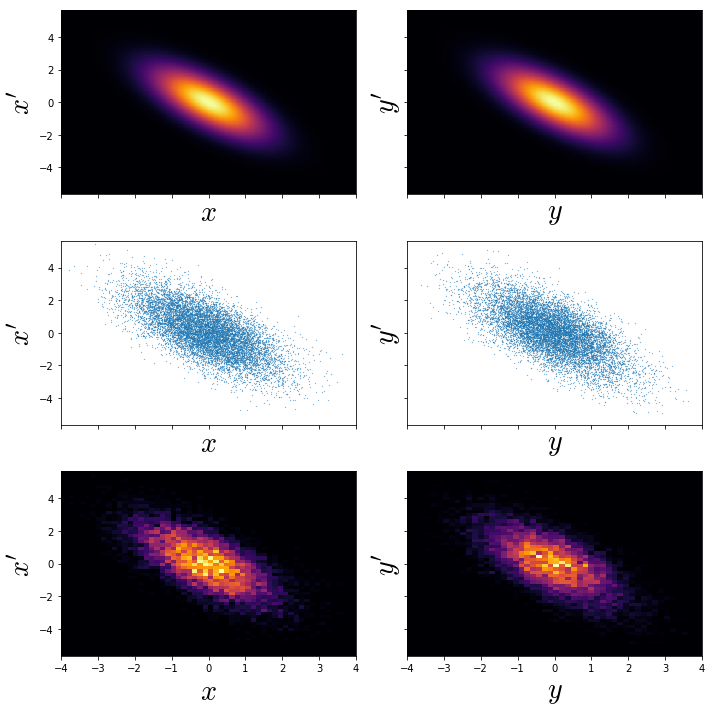

In [18]:
# Show an example of the comapring plots with default Twiss parameters
example3=gaussian_compare_plot()

In [19]:
# Create interactive plot in order to visualize the distributions
# Create widgets to change the Twiss parameters and emmitances of both plots
N_widget3=widgets.IntSlider(min=1, max=1000000, step=100, value=10000, description=r'$N$', 
                              continuous_update=False, fontsize=26,readout_format='d')

ax_widget3=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

bx_widget3=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_x$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsx_widget3=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_x$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

ay_widget3=widgets.FloatSlider(min=-10, max=10, step=.01, value=1, description=r'$\alpha_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

by_widget3=widgets.FloatSlider(min=0.01, max=20, step=.01, value=1, description=r'$\beta_y$', 
                              continuous_update=False, fontsize=26,readout_format='.2f')

ermsy_widget3=widgets.FloatSlider(min=0, max=10, step=.01, value=1, description=r'$\epsilon_y$',
                                 continuous_update=False, fontsize=26,readout_format='.2f')

# Save widgets into widgets boxes
left_box= VBox([ax_widget3, bx_widget3, ermsx_widget3])
right_box= VBox([ay_widget3, by_widget3, ermsy_widget3])
widget_box2= VBox([HBox([Label('Number of particles'),N_widget3]),HBox([left_box, right_box])])

# Create interactive plot with the corresponding widgets
output3= interactive_output(gaussian_compare_plot,{'N': N_widget3, 'ax': ax_widget3, 'bx': bx_widget3, 'ermsx': ermsx_widget3,
                                           'ay': ay_widget3, 'by': by_widget3, 'ermsy': ermsy_widget3})

In [20]:
# Initiate interactive comparative plots
# Be patient for large N (sampling size) it takes some time for the plot to update
widgets.VBox([widget_box2, output3])